# Lab 11: Clustering


In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

import seaborn as sns
%matplotlib inline

In [2]:
# Load iris datset, set 'species' to be categorical variable containing
# class labels
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.drop('target', axis='columns',inplace=True)

In [3]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

# Exploring and Evaluating Clusters

## K-means

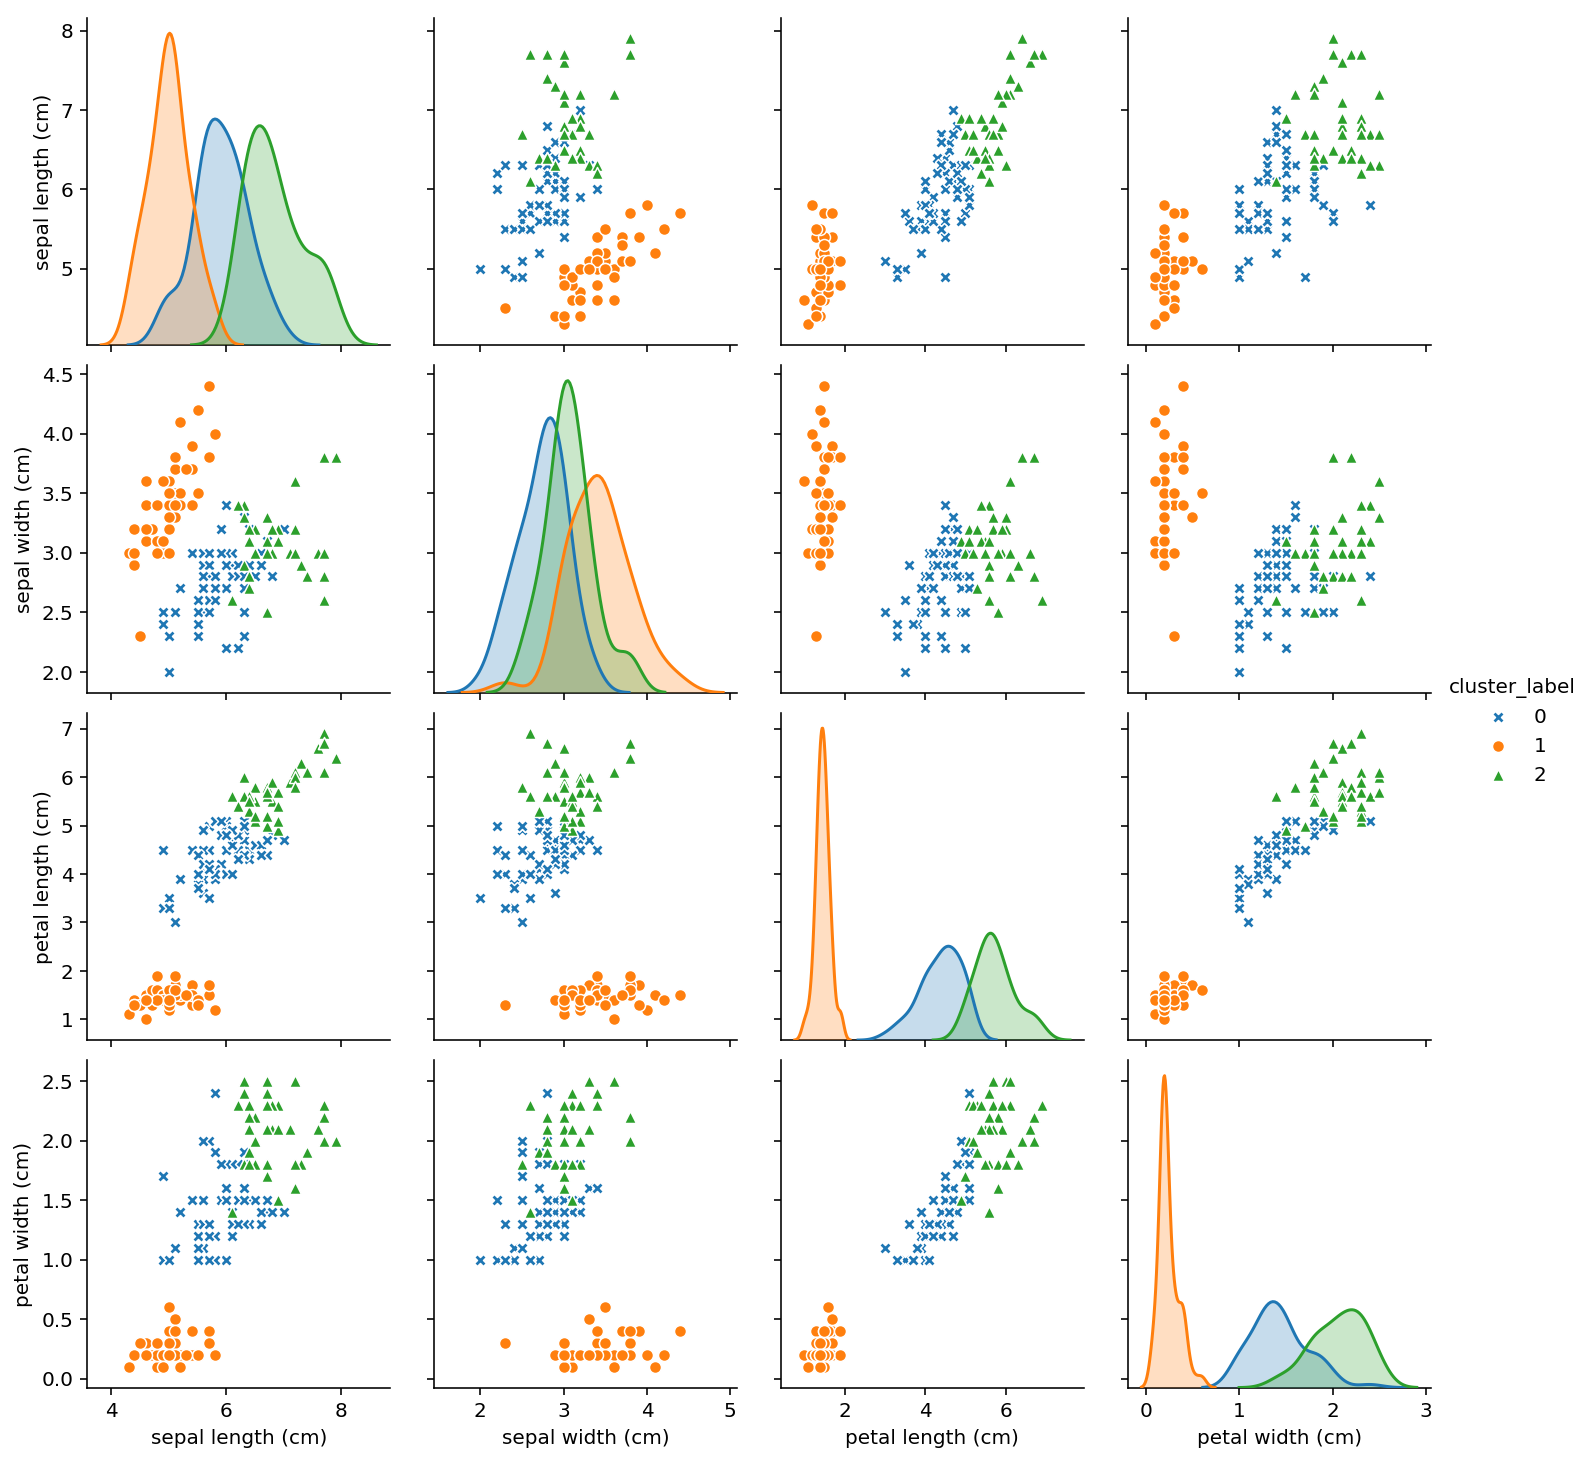

In [4]:
# Let's use a pipeline so we can add preprocessing steps later
cl_pipe = Pipeline([
    ('kmeancl',KMeans(n_clusters=3)) # Name of operator and cluster number
])

# Fit the cluster and predict the label in one step. Calls any preprocessing step plus model
df['cluster_label'] = cl_pipe.fit_predict(X)

# Create a pairplot using seaborn
sns.pairplot(vars=iris['feature_names'], # Variable names   
             hue='cluster_label',        # How to colour the points. Use cluster labels
             markers=['X','o','^'],      # Differentiate markers
             data=df                     # What data to use
            )

## Agglomerative

In [5]:
# Now a pipeline with the agglomerative cluster. Receibes
cl_pipe = Pipeline([
    ('aggcl',AgglomerativeClustering(n_clusters=3,         # Number of clusters
                                     affinity='euclidean', # Type of distance. Depends on your data and you can create your own!
                                     linkage="single"      # Type of linkage. Options 
                                    )
    )
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(vars=iris['feature_names'], 
             hue='cluster_label',
             markers=['X','o','^'],
             data=df,
             diag_kind='hist'            # What plot to use for diagonal. kde causes issues in single linkage due to too few points
            )

TypeError: 'numpy.int64' object is not iterable

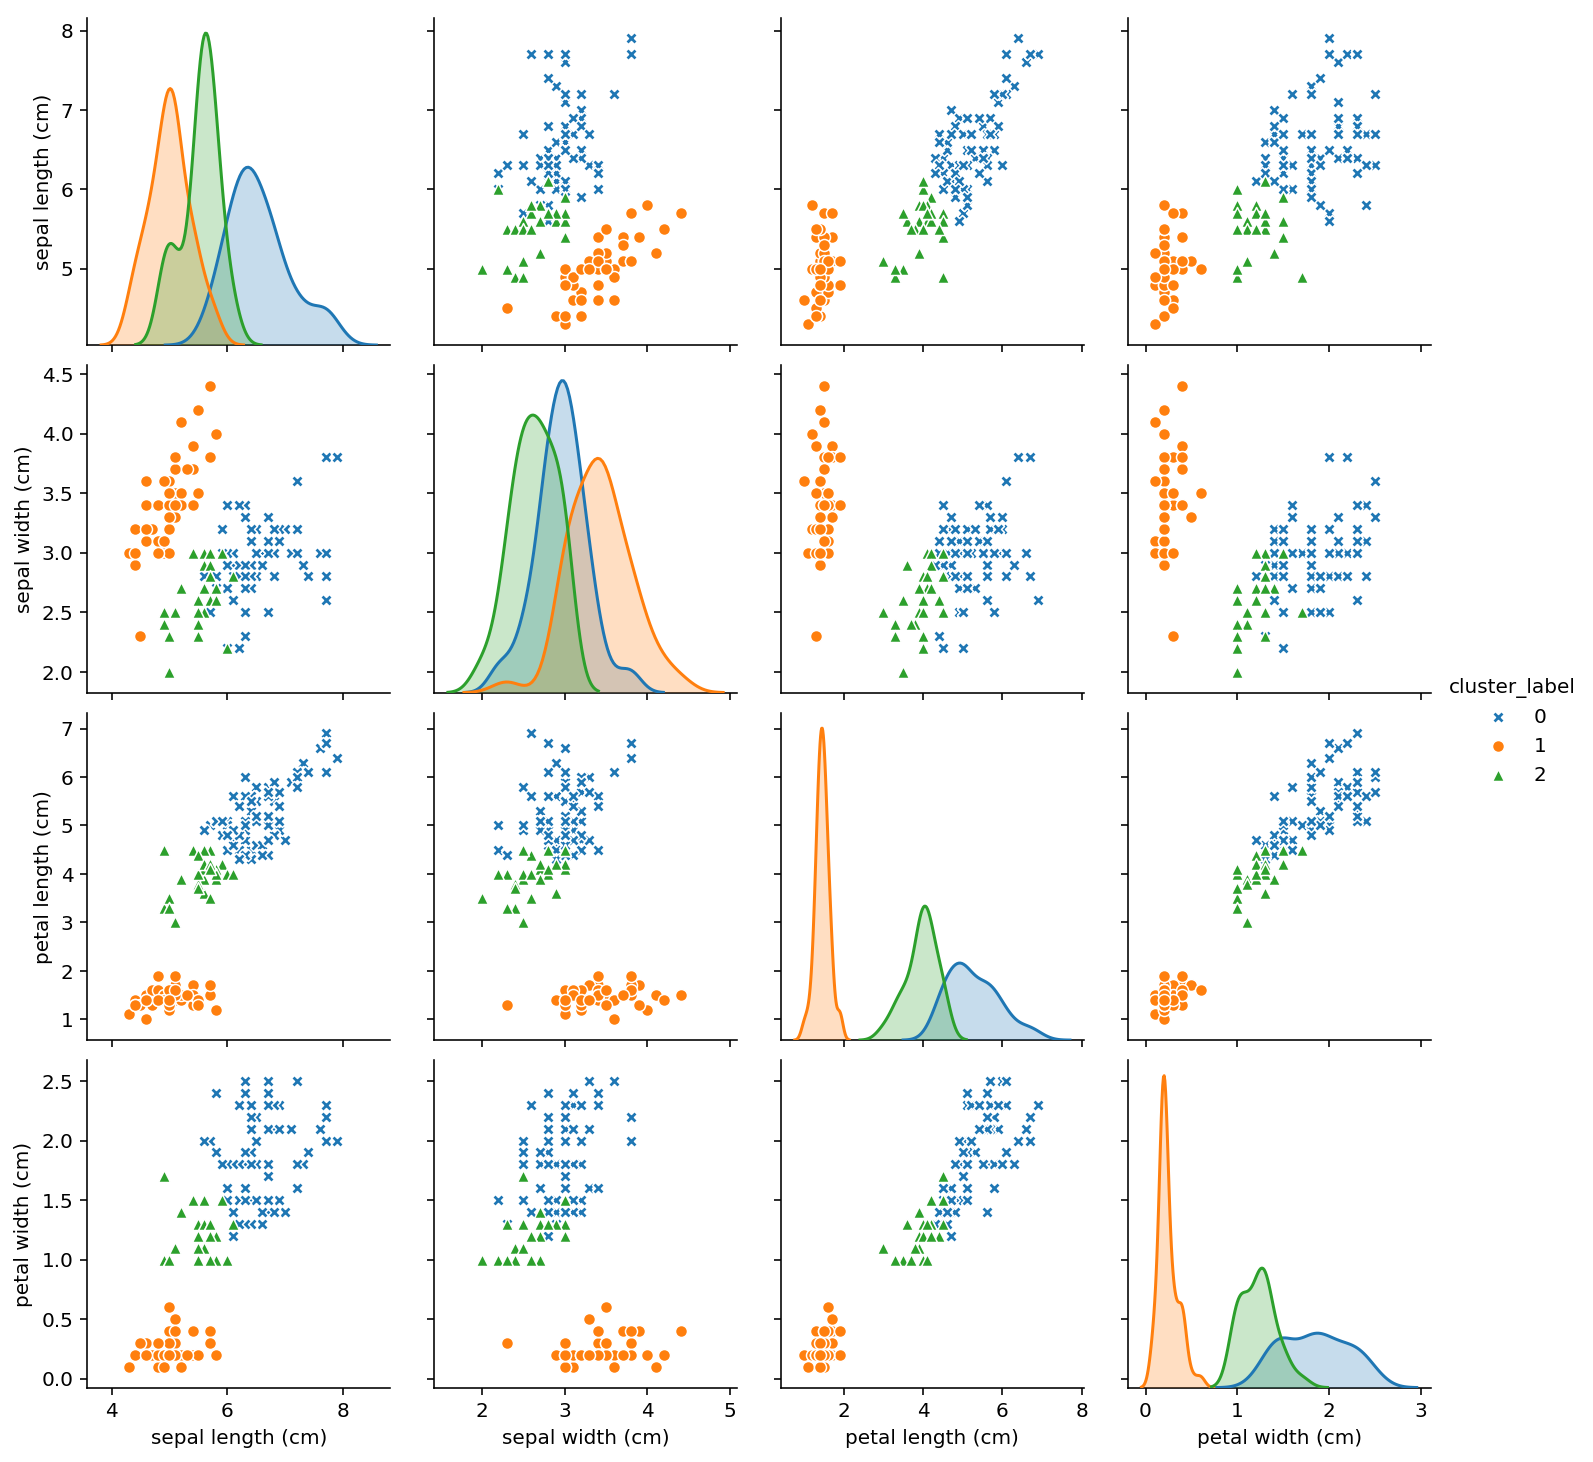

In [6]:
# Now a pipeline with the agglomerative cluster. Receibes
cl_pipe = Pipeline([
    ('aggcl',AgglomerativeClustering(n_clusters=3,         # Number of clusters
                                     affinity='euclidean', # Type of distance. Depends on your data and you can create your own!
                                     linkage="complete"      # Type of linkage. Options 
                                    )
    )
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(vars=iris['feature_names'], 
             hue='cluster_label',
             markers=['X','o','^'],
             data=df,
             diag_kind='kde'            # What plot to use for diagonal. kde causes issues in single linkage due to too few points
            )

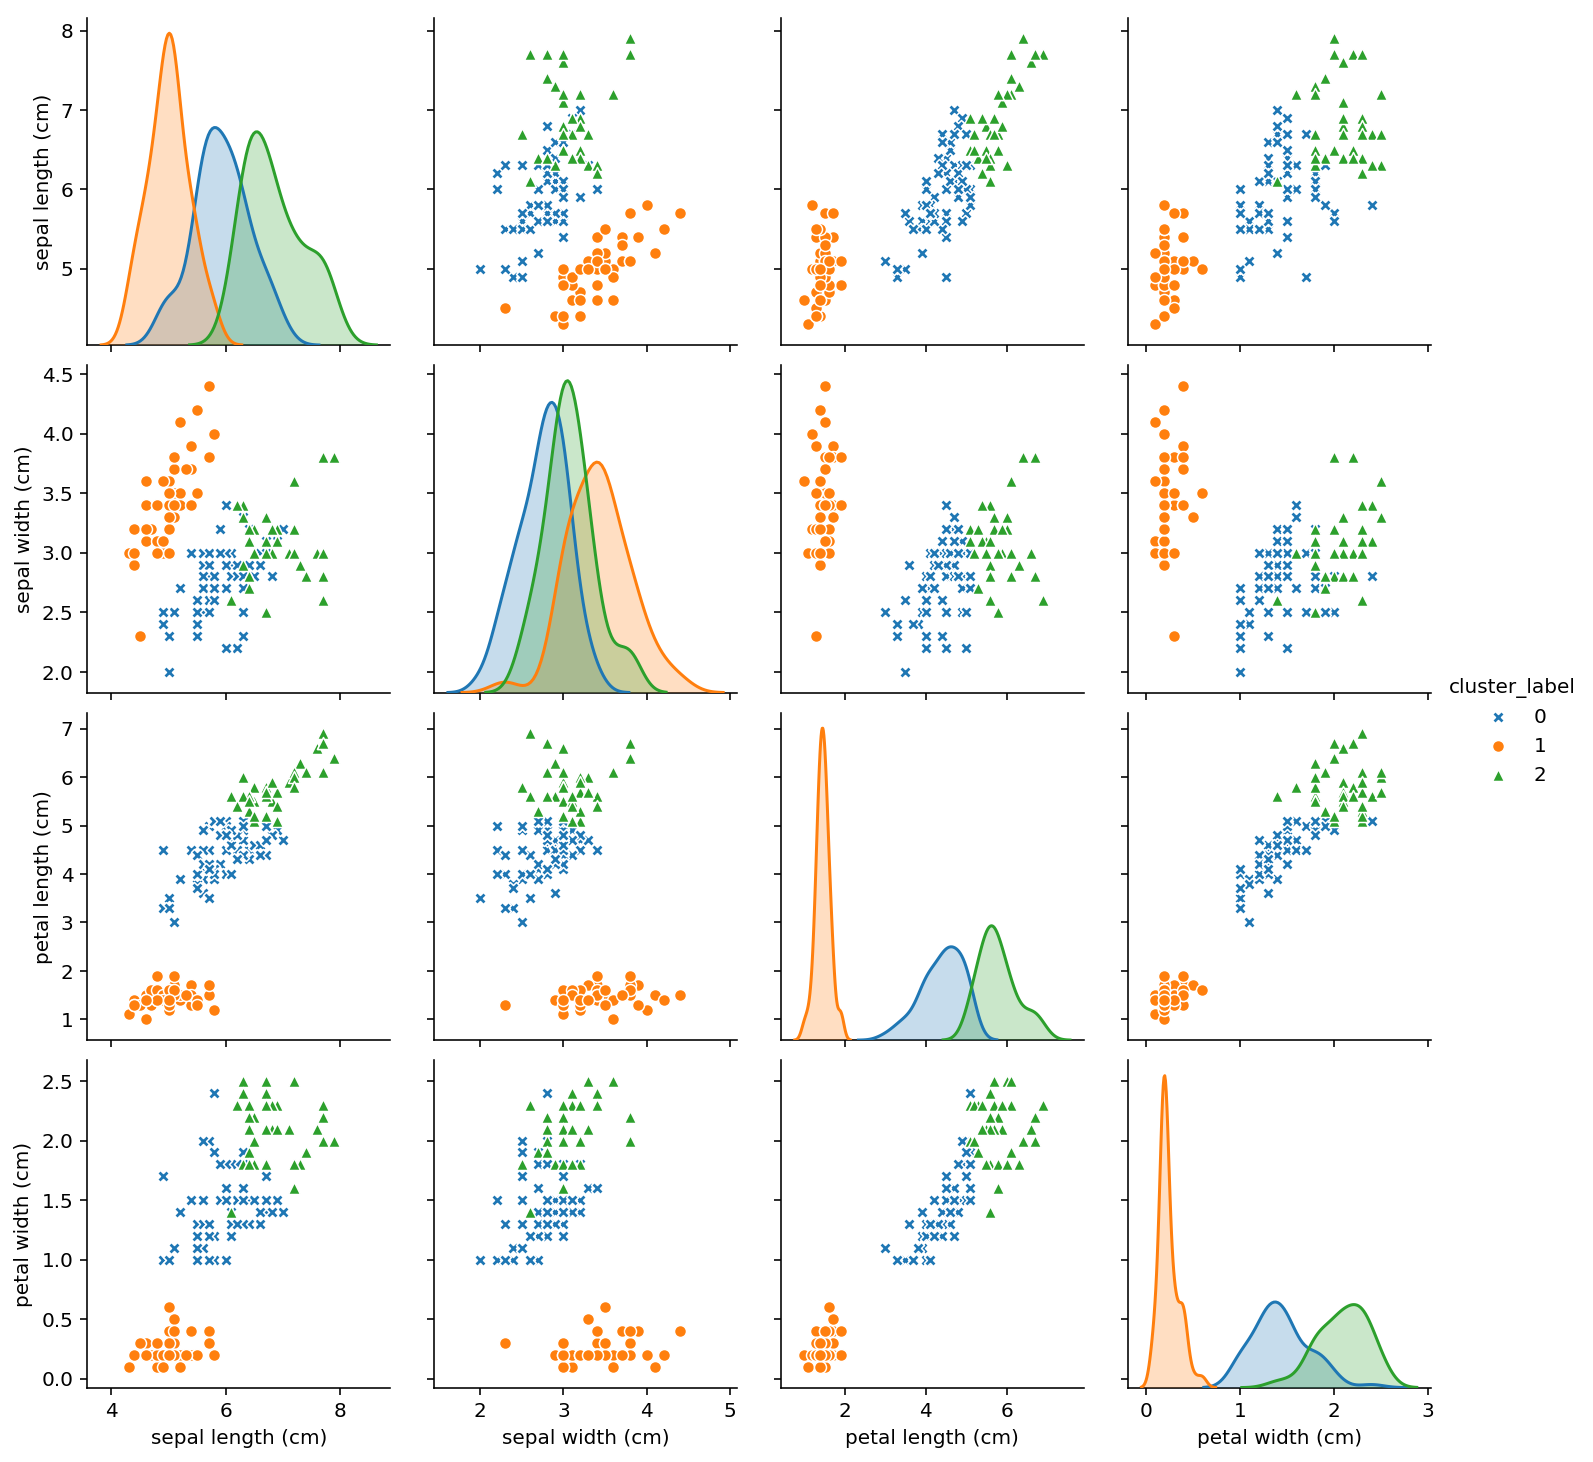

In [7]:
# Now a pipeline with the agglomerative cluster. Receibes
cl_pipe = Pipeline([
    ('aggcl',AgglomerativeClustering(n_clusters=3,         # Number of clusters
                                     affinity='euclidean', # Type of distance. Depends on your data and you can create your own!
                                     linkage="average"      # Type of linkage. Options 
                                    )
    )
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(vars=iris['feature_names'], 
             hue='cluster_label',
             markers=['X','o','^'],
             data=df,
             diag_kind='kde'            # What plot to use for diagonal. kde causes issues in single linkage due to too few points
            )

## Scaling

In [8]:
# Now we create a proper pipeline with scaling and a model
cl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', AgglomerativeClustering(n_clusters=3, linkage="single"))
])

# Again we fit and predict
df['cluster_label_scaled'] = cl_pipe.fit_predict(X)

# And we plot
sns.pairplot(vars=iris['feature_names'],
             hue='cluster_label_scaled',
             data=df,
             diag_kind='hist')

TypeError: 'numpy.int64' object is not iterable

# Some synthetic data

In [ ]:
centers = [(0,0,0),(0,0,1),(0,1,0),(0,1,1),
           (1,0,0),(1,0,1),(1,1,0),(1,1,1)]
X, y = datasets.make_blobs(n_samples=400, centers=centers, 
           cluster_std=0.25, shuffle=True, random_state=0)

synth_df = pd.DataFrame(X)
sns.scatterplot(data=X)

In [ ]:
acl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', AgglomerativeClustering(n_clusters=8, linkage="average"))
])

synth_df['cluster_label_scaled'] = acl_pipe.fit_predict(X)

print(silhouette_score(X, synth_df['cluster_label_scaled']))

sns.pairplot(hue='cluster_label_scaled', vars=[0,1,2], data=synth_df)

In [ ]:
fig = plt.figure(figsize=(4, 4))
ax = Axes3D(fig, elev=60, azim=134)
ax.scatter(synth_df.iloc[:, 0], synth_df.iloc[:, 1], synth_df.iloc[:, 2],
           c=synth_df['cluster_label_scaled'], edgecolor='k')

# Silhouette Plot Example

In [44]:
# Make some complex data
X, y = datasets.make_moons(n_samples=400, random_state=0)

synth_df = pd.DataFrame(X)

The silhouette score for an Agglomerative Cluster is 0.334


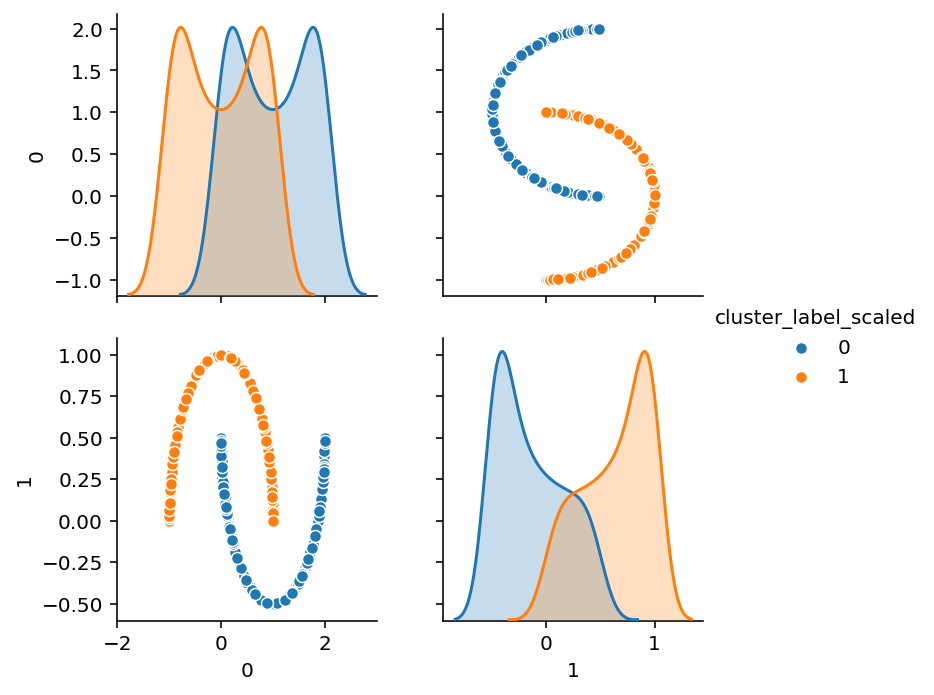

In [45]:
# Create a pipeline
acl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', AgglomerativeClustering(n_clusters=2, linkage="single"))
])

# Fit it
synth_df['cluster_label_scaled'] = acl_pipe.fit_predict(X)

# Calculate the silhouette score
agg_sil_avg = silhouette_score(X, synth_df['cluster_label_scaled'])
print('The silhouette score for an Agglomerative Cluster is %.3f' % agg_sil_avg)

# plot the output
sns.pairplot(hue='cluster_label_scaled', vars=[0,1], data=synth_df)
plt.show()

The silhouette score for K-means is 0.473


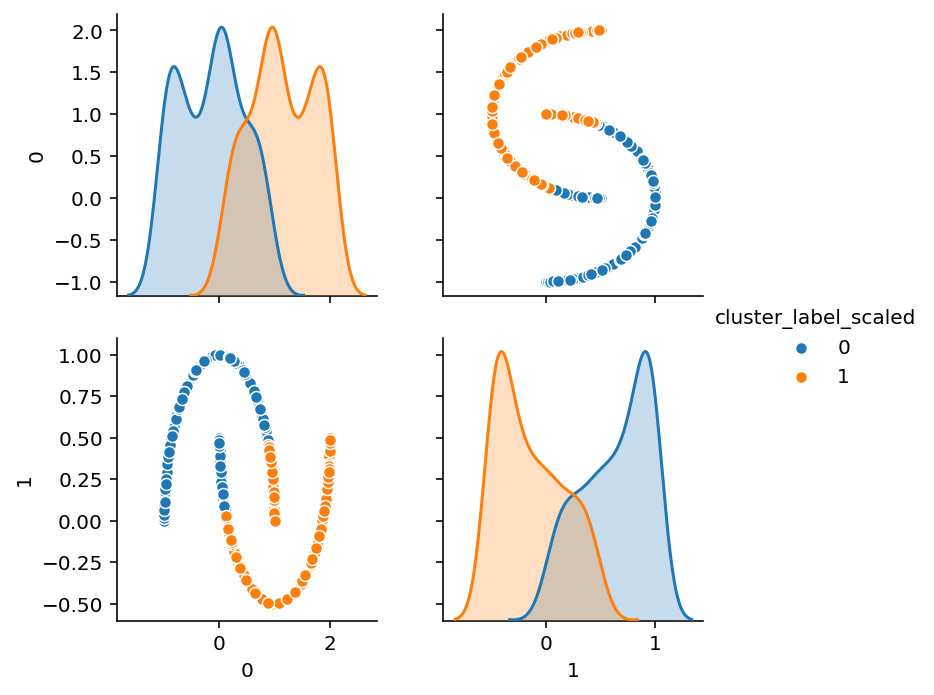

In [46]:
# Repeat, but now using k-means
kmeans_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=2))
])

synth_df['cluster_label_scaled'] = kmeans_pipe.fit_predict(X)

kmeans_sil_avg = silhouette_score(X, synth_df['cluster_label_scaled'])
print('The silhouette score for K-means is %.3f' % kmeans_sil_avg)

sns.pairplot(hue='cluster_label_scaled', vars=[0,1], data=synth_df)
plt.show()

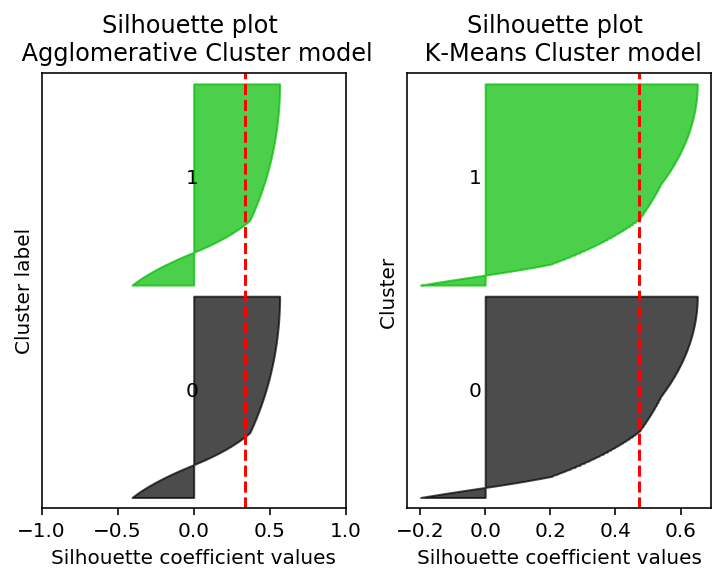

In [47]:
# Create a full silhoutte plot for the models

# Initialize the plot. Two plots, side-by-side, stores in ax1 and ax2.
fig, (ax1, ax2) = plt.subplots(1, 2)
n_clusters = 2

# Set limits. Score can go between -1, 1 but they sometimes can be trimmed.
ax1.set_xlim([-1, 1])
ax1.set_xlim([-1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
ax2.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
agg_cluster_labels = acl_pipe.fit_predict(X)
kmeans_cluster_labels = kmeans_pipe.fit_predict(X)


# Compute the silhouette scores for each sample
sample_silhouette_values_agg = silhouette_samples(X, agg_cluster_labels)
sample_silhouette_values_kmeans = silhouette_samples(X, kmeans_cluster_labels)

y_lower = 10

# Iterate over the clusters - Agglomerative
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values_agg[agg_cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot \n Agglomerative Cluster model")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=agg_sil_avg, color="red", linestyle="--")

ax1.set_yticks([])

# Iterate over the clusters - K-means
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values_kmeans[kmeans_cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax2.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax2.set_title("Silhouette plot \n K-Means Cluster model")
ax2.set_xlabel("Silhouette coefficient values")
ax2.set_ylabel("Cluster ")

# The vertical line for average silhouette score of all the values
ax2.axvline(x=kmeans_sil_avg, color="red", linestyle="--")

ax2.set_yticks([])  

plt.show()